In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("apple_quality.csv")

In [ ]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [ ]:
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
data['Quality']=lbl.fit_transform(data['Quality'])


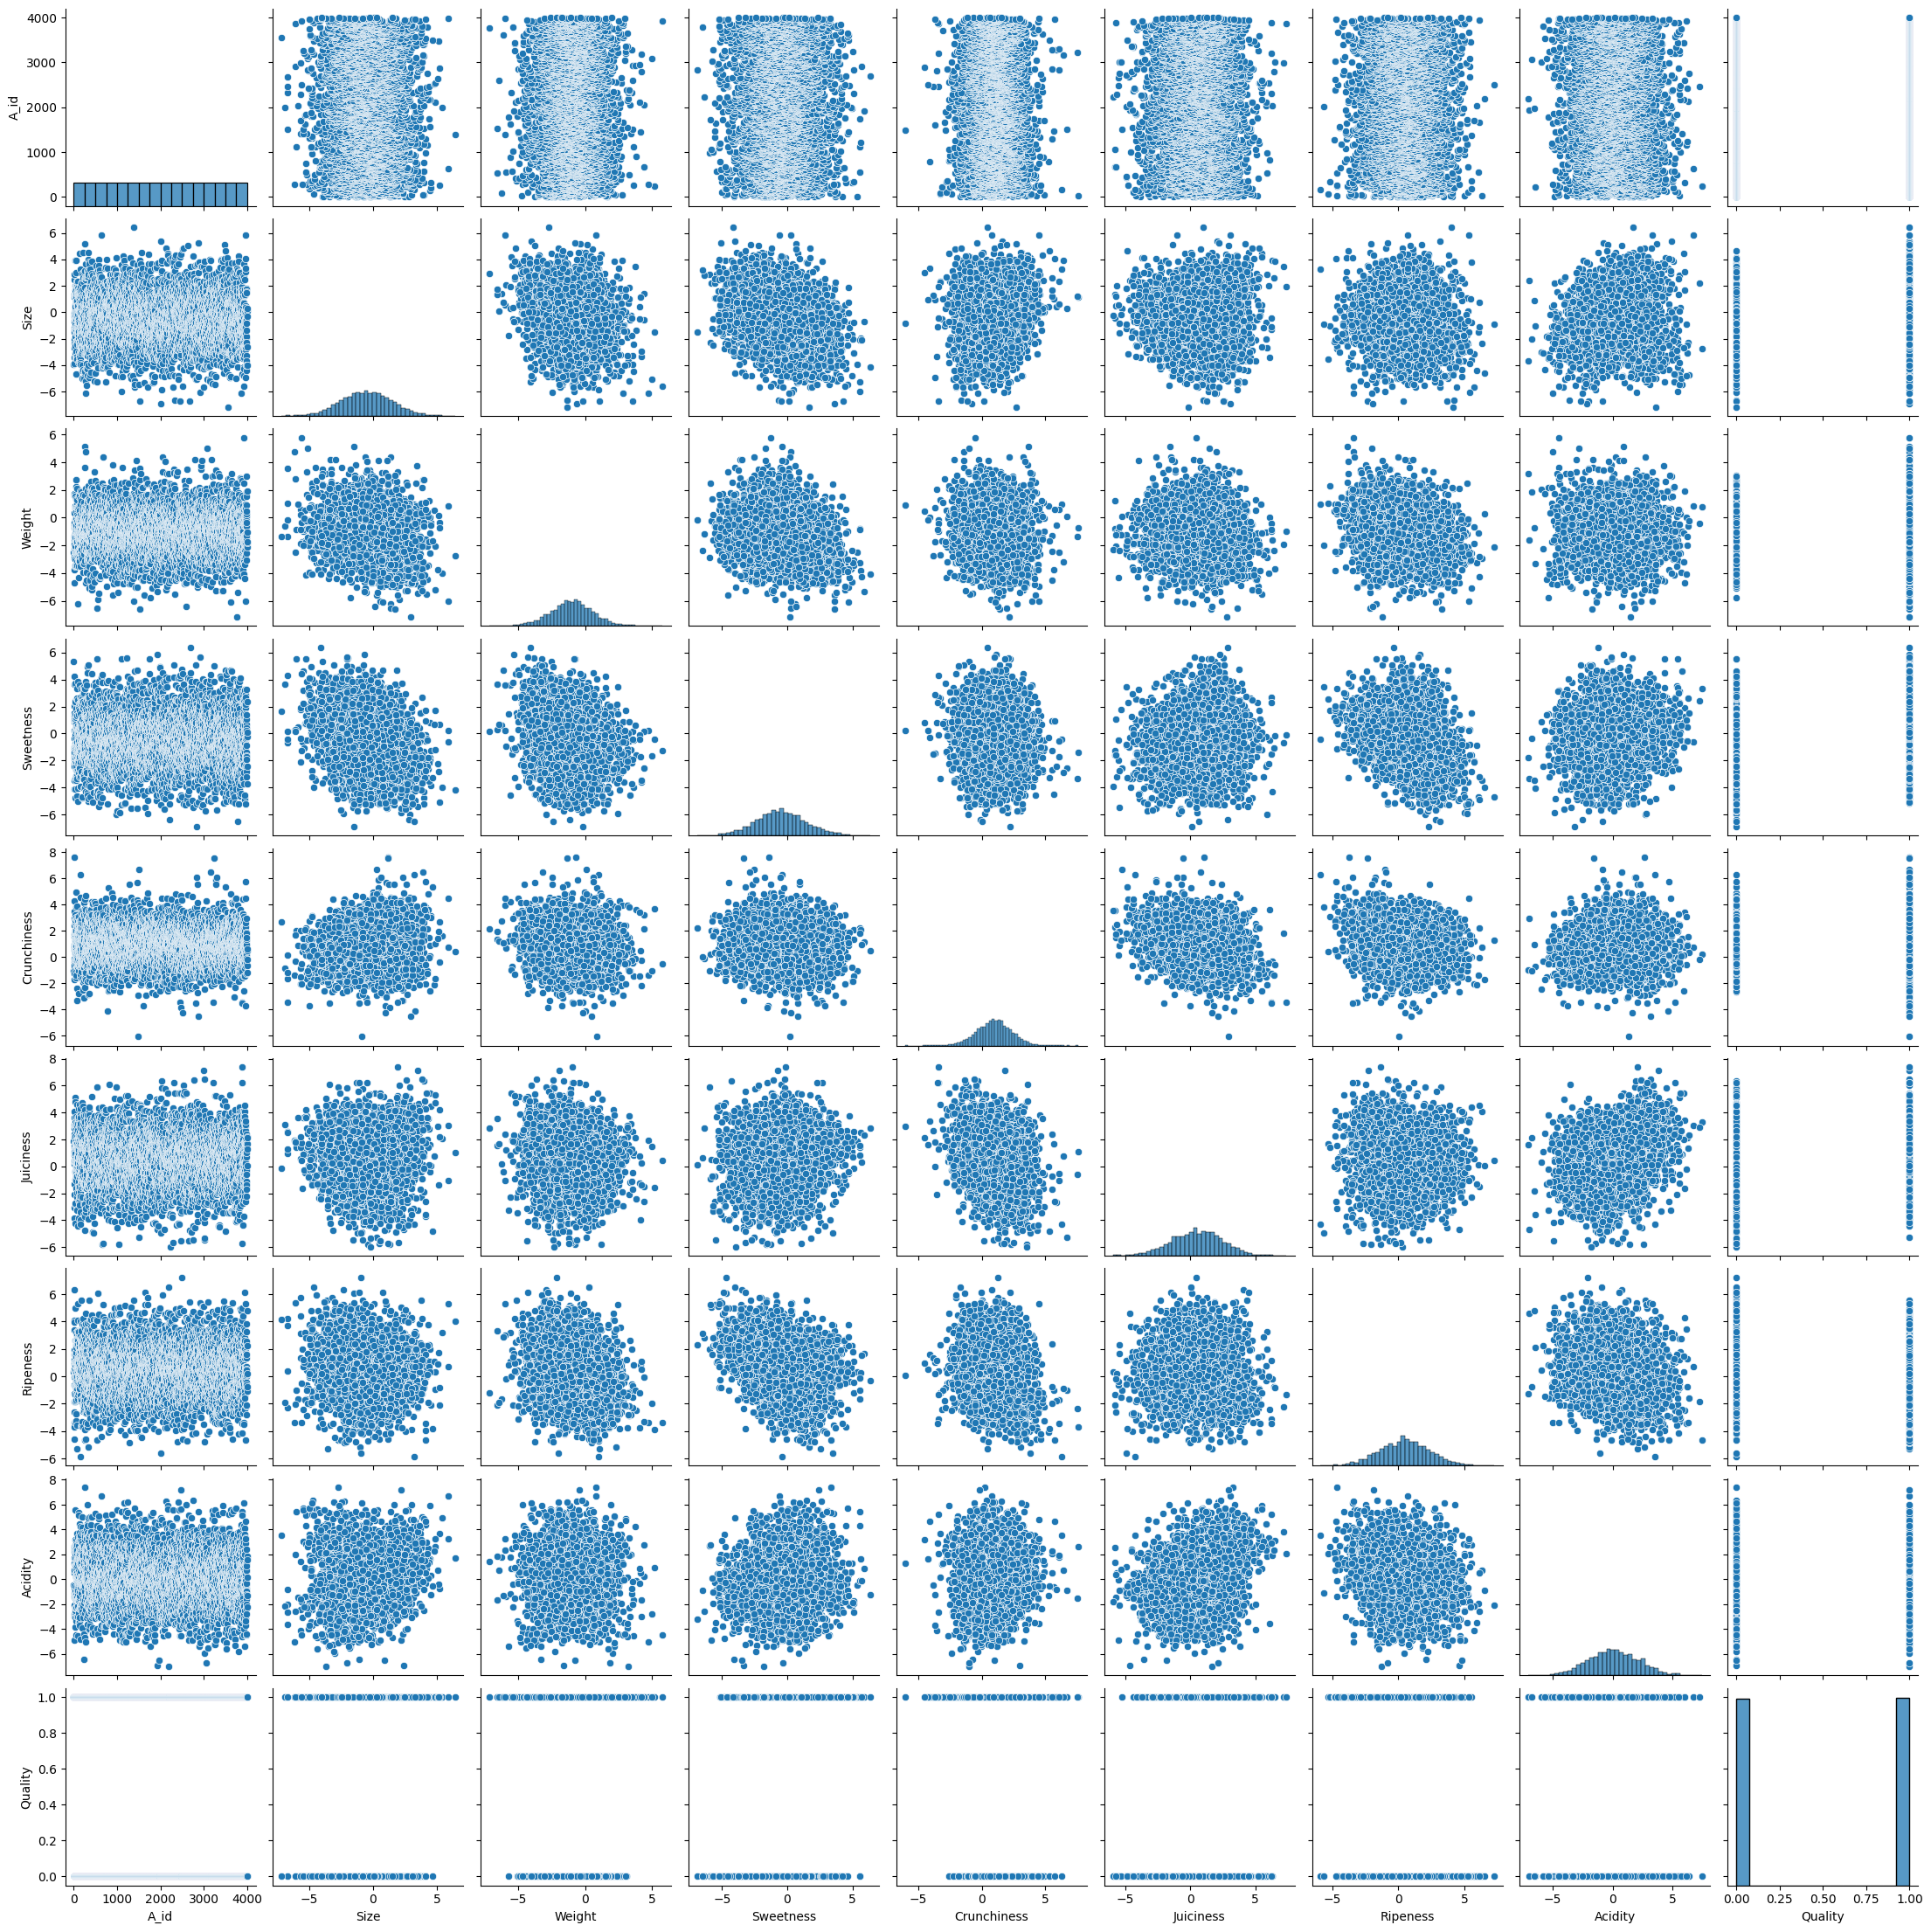

In [ ]:
import seaborn as sns
sns.pairplot(data)

In [ ]:
data.corr()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,1.000000,-0.028911,-0.005730,-0.002378,-0.013111,0.006179,0.000742,-0.022237,0.004875
Size,-0.028911,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.005730,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.002378,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,-0.013111,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,0.006179,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,0.000742,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,-0.022237,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.004875,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


In [ ]:
x=data.drop("Quality",axis=1)
y=data['Quality']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

forward_select=SequentialFeatureSelector(lr_model,n_features_to_select='auto',direction='forward',scoring='accuracy',cv=5)


backward_select=SequentialFeatureSelector(lr_model,n_features_to_select='auto',direction='backward',scoring='accuracy',cv=5)


In [ ]:
front=forward_select.fit(xtrain,ytrain)
selected_forward_features=xtrain.columns[front.get_support()]
selected_forward_features

Index(['Size', 'Weight', 'Sweetness', 'Juiciness'], dtype='object')

In [ ]:
back=backward_select.fit(xtrain,ytrain)
selected_backward_features=xtrain.columns[back.get_support()]
selected_backward_features

Index(['Size', 'Weight', 'Sweetness', 'Juiciness'], dtype='object')

In [ ]:
#logistic regression after feature slection


In [ ]:
x_features=data[selected_backward_features]
x_features

,Size,Weight,Sweetness,Juiciness
0,-3.970049,-2.512336,5.346330,1.844900
1,-1.195217,-2.839257,3.664059,0.853286
2,-0.292024,-1.351282,-1.738429,2.838636
3,-0.657196,-2.271627,1.324874,3.637970
4,1.364217,-1.296612,-0.384658,3.030874
...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,1.697986
3996,-0.293118,1.949253,-0.204020,0.024523
3997,-2.634515,-2.138247,-2.440461,2.199709
3998,-4.008004,-1.779337,2.366397,2.161435


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_features,y,test_size=0.2,random_state=42)
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       401
           1       0.76      0.74      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
cm=confusion_matrix(ytest,ypred)
cm

array([[306,  95],
       [102, 297]])

In [ ]:
np.unique(y).tolist()

[0, 1]

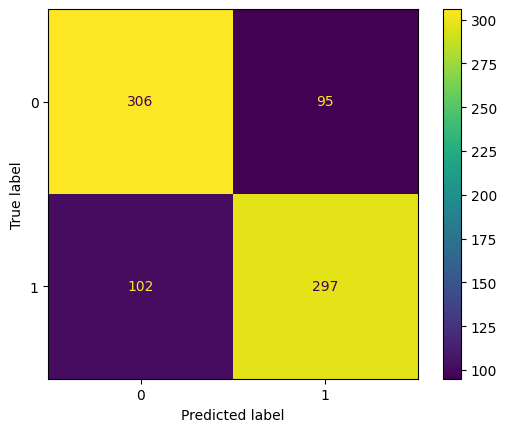

In [ ]:
cmat=ConfusionMatrixDisplay(cm,display_labels=np.unique(y).tolist())
cmat.plot()

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
features_data=x.columns
dt=DecisionTreeClassifier(
criterion='gini',#or entrophy
splitter='best',#or random
max_depth=5,
min_samples_split=2,#minimum samples to take to split the internal node
min_samples_leaf=1,#minimum sample rewuired at leaf node
max_features=None,# no.of features to consider for best split (auto,sqrt,l2)
random_state=None)


In [ ]:
dt.fit(xtrain,ytrain)
dt_pred=dt.predict(xtest)
accuracy_score(ytest,dt_pred)

0.7625

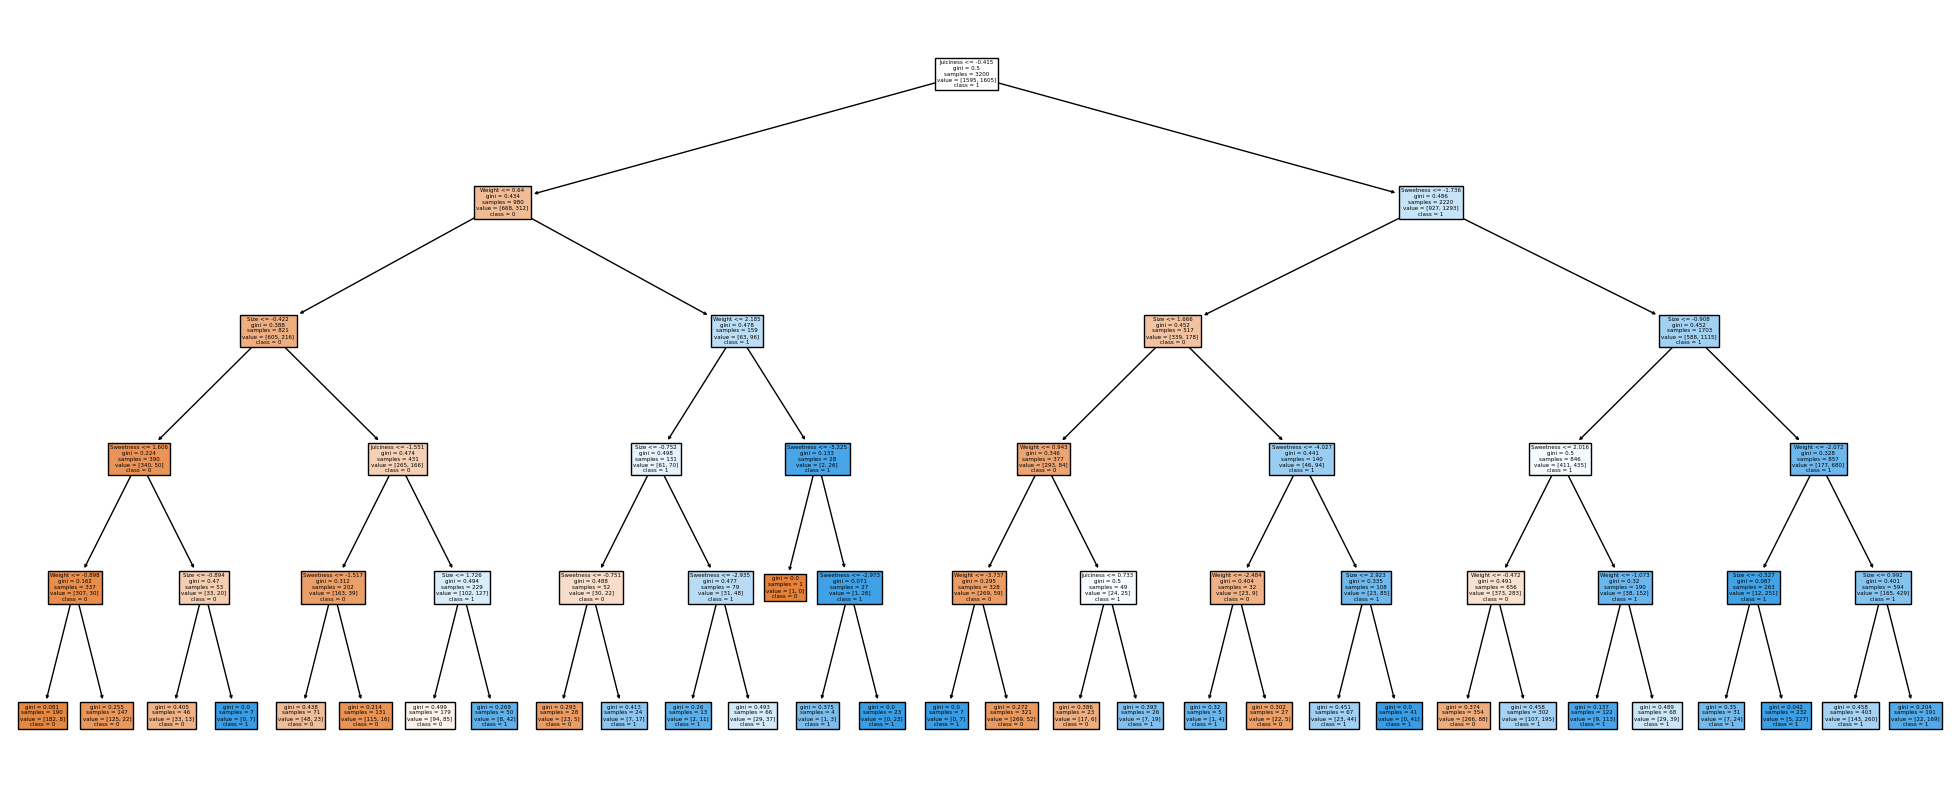

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plot_tree(dt,filled=True,feature_names=xtrain.columns.tolist(),class_names=np.unique(y).astype(str).tolist())
plt.show()

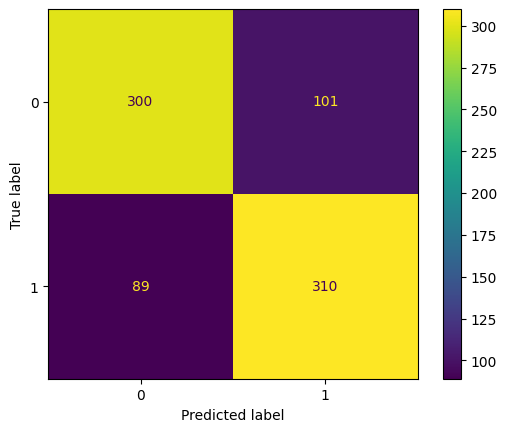

In [ ]:
cm=confusion_matrix(ytest,dt_pred)
cm
np.unique(y).tolist()
cmat=ConfusionMatrixDisplay(cm,display_labels=np.unique(y).tolist())
cmat.plot()

In [ ]:
#rf
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
n_estimators=100,#no.of trees
criterion='gini',#or entropy
max_depth=None,
min_samples_split=2,#minimum samples to take to split the internal node
min_samples_leaf=1,#minimum sample rewuired at leaf node
bootstrap=True,#whether bootstramp smaples to be used
random_state=None)


In [ ]:
rf.fit(xtrain,ytrain)
rf_pred=rf.predict(xtest)

In [ ]:
imp=rf.feature_importances_
indices=np.argsort(rf.feature_importances_)[::-1]
indices
indices.tolist()
col=[]
for i in indices.tolist():
  print(x.columns[i])
  col.append(x.columns[i])

Weight
A_id
Sweetness
Size


([0, 1, 2, 3],
 [Text(0, 0, 'Weight'),
  Text(1, 0, 'A_id'),
  Text(2, 0, 'Sweetness'),
  Text(3, 0, 'Size')])

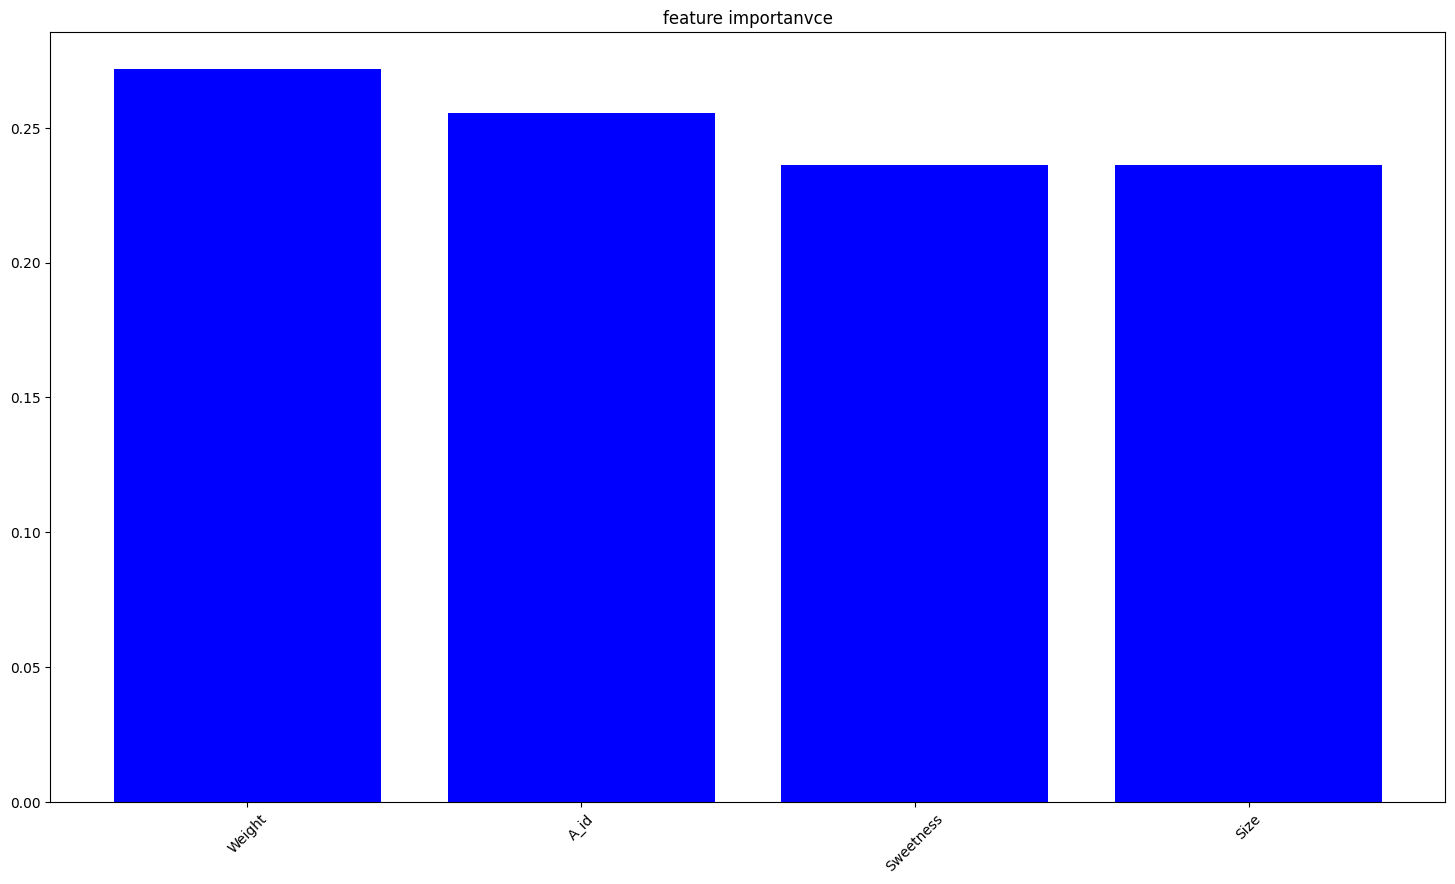

In [ ]:
plt.figure(figsize=(18,10))
plt.title('feature importanvce')
plt.bar(col,imp[indices],color='b',align='center')
plt.xticks(rotation=45)

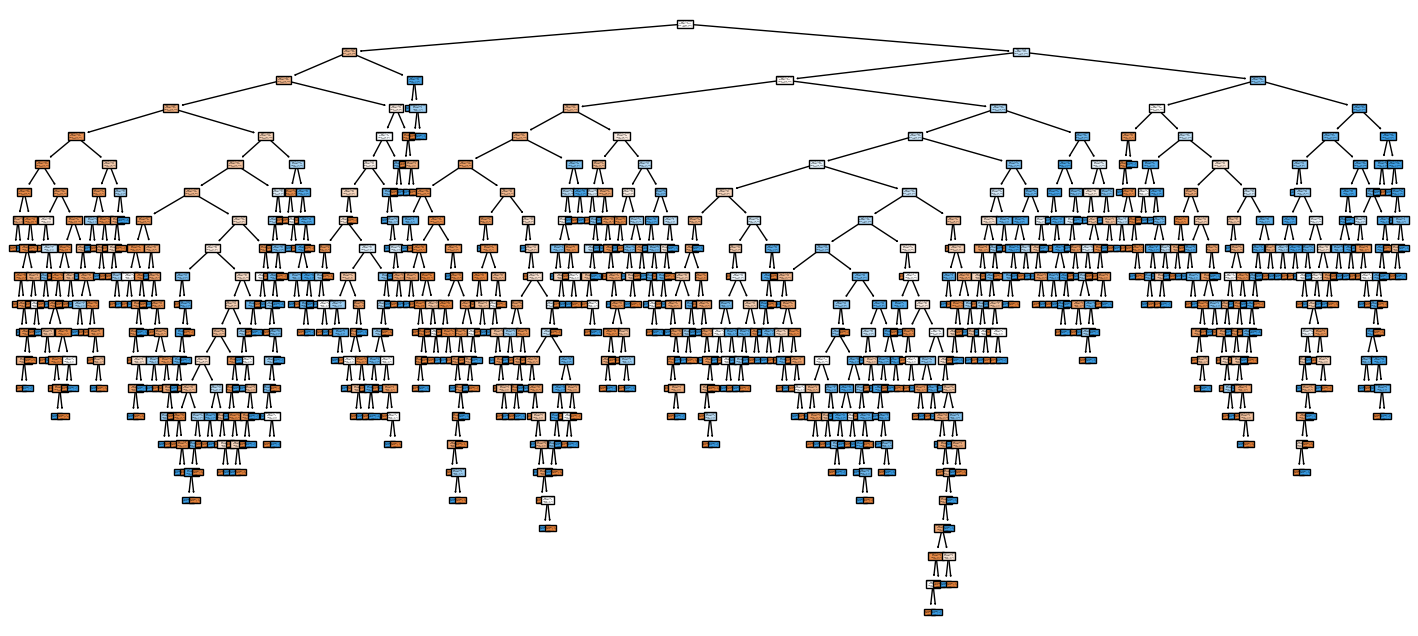

In [ ]:
single_tree=rf.estimators_[1]
plt.figure(figsize=(18,8))
plot_tree(single_tree,filled=True,feature_names=xtrain.columns.tolist(),class_names=np.unique(y).astype(str).tolist())
plt.show()

In [ ]:
print(accuracy_score(ytest,rf_pred))

0.7875


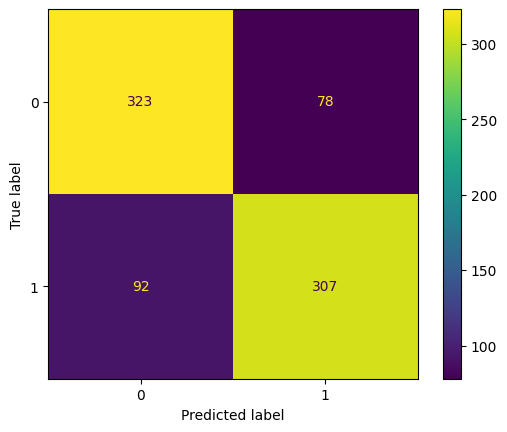

In [ ]:
cm=confusion_matrix(ytest,rf_pred)
cm
np.unique(y).tolist()
cmat=ConfusionMatrixDisplay(cm,display_labels=np.unique(y).tolist())
cmat.plot()

In [ ]:
from sklearn.svm import SVC
svc_c=SVC(
C=1.0,#reverse of penalty
kernel='rbf',#linear,poly,sigmoid,rbf
degree=3,#will only work when kernal= poly
gamma='scale',#when kernal ='rbf','poly','sigmoid'
coef0=0.0,#independent kernal function for poly and sigmoid used for specific search[heuristic search]
shrinking=True,#enable heuristic approch
probability =False,#enable probability output
tol=1e-3,#tolerance level
cache_size =200,
class_weight=None,#this is for balanced class
verbose=False,#controll the message
max_iter=-1,#-1 for soft limit or 50,100 for hard limit
decision_function_shape='ovr',#one vs rest deccision
break_ties=False,#class is greater than 2 then it is true
random_state=None)

In [ ]:
svc_c.fit(xtrain,ytrain)

SVC()

In [ ]:
svc_pred=svc_c.predict(xtest)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
xtrain_scaled=mm.fit_transform(xtrain)
xtest_scaled=mm.transform(xtest)
svc_c.fit(xtrain_scaled,ytrain)
svc_pred_s=svc_c.predict(xtest_scaled)
accuracy_score(ytest,svc_pred_s)

0.8025

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(ytest,svc_pred_s,pos_label=1)
roc_auc=auc(fpr,tpr)

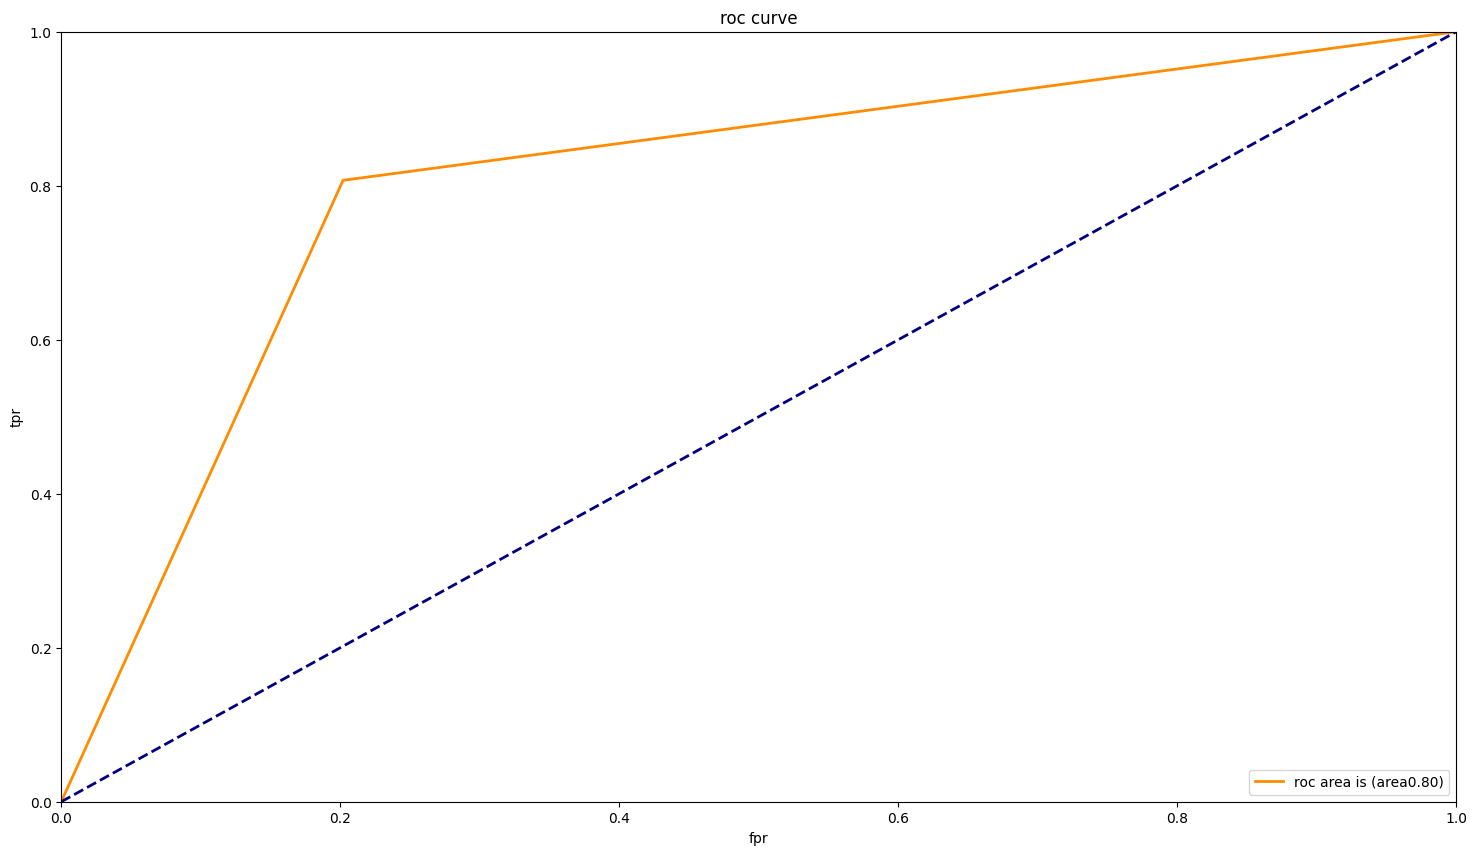

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='roc area is (area%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#from roc curve it is clear that SVM is not a good model for this data set classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,
learning_rate=0.1,
max_depth=3,
random_state=42)

gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
ypred=gbc.predict(xtest)
accuracy_score(ytest,ypred)

0.78875

In [ ]:
x=data.drop('Quality',axis=1)

In [ ]:
y=data['Quality']

In [ ]:
#Part B PCA
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pc=PCA()
pc.fit(x_scaled)

PCA()

In [ ]:
explained_variance=pc.explained_variance_ratio_
print(explained_variance)

[0.18921858 0.18273804 0.15704873 0.14324376 0.12481554 0.08847245
 0.07613224 0.03833066]


In [ ]:
n_components=(explained_variance.cumsum()>=0.95).argmax()+1

In [ ]:
pca_model=PCA(n_components=8)
pca_model.fit(x_scaled)

PCA(n_components=8)

In [ ]:
prop_var=pca_model.explained_variance_ratio_
prop_var.shape

(8,)

In [ ]:
nc=pca_model.n_components_
number_comp=np.arange(nc)+1

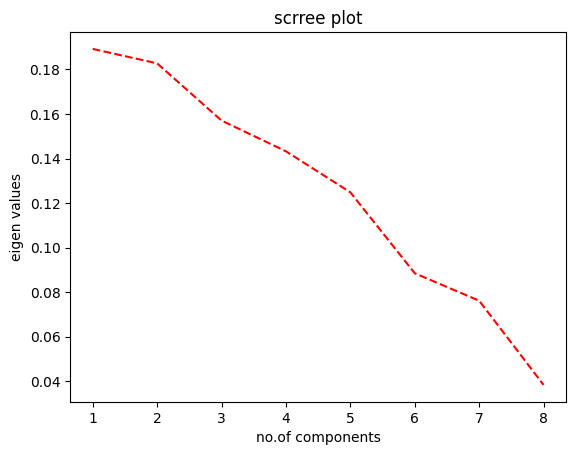

In [ ]:
import matplotlib.pyplot as plt
#scree plot
plt.title("scrree plot")
plt.xlabel("no.of components")
plt.ylabel("eigen values")
plt.plot(number_comp,prop_var,'r--')
plt.show()

In [ ]:
pca_final=PCA(n_components=3)
pc_compoents=pca_final.fit_transform(x_scaled)
print(pc_compoents,pc_compoents.shape)

[[ 0.56294638  3.34146471  0.08123734]
 [ 0.45356599  0.93075907  0.03754534]
 [ 0.97393594  0.27841594  1.41982172]
 ...
 [-2.16230038  0.79959979  1.43872479]
 [-0.33794099  2.68561994 -0.25429879]
 [ 0.78810547  0.77739883  0.89292968]] (4000, 3)


In [ ]:
loading=pca_final.components_
loading.shape

(3, 8)

In [ ]:
feature_names=x.columns

pc1_features=pd.Series(loading[0],index=feature_names)
pc2_features=pd.Series(loading[1],index=feature_names)
pc3_features=pd.Series(loading[2],index=feature_names)
pc1_features,pc2_features

(A_id          -0.038837
 Size           0.196773
 Weight         0.047527
 Sweetness      0.334072
 Crunchiness    0.173974
 Juiciness      0.348256
 Ripeness      -0.610329
 Acidity        0.567326
 dtype: float64,
 A_id           0.058103
 Size          -0.616874
 Weight         0.080340
 Sweetness      0.479537
 Crunchiness   -0.505270
 Juiciness      0.340506
 Ripeness       0.039204
 Acidity       -0.083074
 dtype: float64)

In [ ]:
final_data=pd.DataFrame(pc_compoents,columns=['pc1','pc2','pc3'])
final_data=pd.concat([final_data,y],axis=1)
final_data

,pc1,pc2,pc3,Quality
0,0.562946,3.341465,0.081237,1
1,0.453566,0.930759,0.037545,1
2,0.973936,0.278416,1.419822,0
3,2.217575,1.159452,0.586947,1
4,1.228165,0.252047,1.128938,1
...,...,...,...,...
3995,-0.971456,-0.456083,1.222149,0
3996,0.792048,0.642863,-0.847838,1
3997,-2.162300,0.799600,1.438725,0
3998,-0.337941,2.685620,-0.254299,1


In [ ]:
x_pca=final_data[['pc1','pc2','pc3']]
y=final_data['Quality']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_pca,y,test_size=0.3,random_state=42)
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64       593
           1       0.65      0.60      0.62       607

    accuracy                           0.63      1200
   macro avg       0.64      0.63      0.63      1200
weighted avg       0.64      0.63      0.63      1200



In [ ]:
#the accuracy fell from 75 beofre pca to 63 after pca

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
features_data=x.columns
dt=DecisionTreeClassifier(
criterion='gini',#or entrophy
splitter='best',#or random
max_depth=5,
min_samples_split=2,#minimum samples to take to split the internal node
min_samples_leaf=1,#minimum sample rewuired at leaf node
max_features=None,# no.of features to consider for best split (auto,sqrt,l2)
random_state=None)
dt.fit(xtrain,ytrain)
dt_pred=dt.predict(xtest)
accuracy_score(ytest,dt_pred)

0.6891666666666667

In [ ]:
#rf
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
n_estimators=100,#no.of trees
criterion='gini',#or entropy
max_depth=None,
min_samples_split=2,#minimum samples to take to split the internal node
min_samples_leaf=1,#minimum sample rewuired at leaf node
bootstrap=True,#whether bootstramp smaples to be used
random_state=None)
rf.fit(xtrain,ytrain)
rf_pred=rf.predict(xtest)
accuracy_score(ytest,rf_pred)

0.6858333333333333

In [ ]:
from sklearn.svm import SVC
svc_c=SVC(
C=1.0,#reverse of penalty
kernel='rbf',#linear,poly,sigmoid,rbf
degree=3,#will only work when kernal= poly
gamma='scale',#when kernal ='rbf','poly','sigmoid'
coef0=0.0,#independent kernal function for poly and sigmoid used for specific search[heuristic search]
shrinking=True,#enable heuristic approch
probability =False,#enable probability output
tol=1e-3,#tolerance level
cache_size =200,
class_weight=None,#this is for balanced class
verbose=False,#controll the message
max_iter=-1,#-1 for soft limit or 50,100 for hard limit
decision_function_shape='ovr',#one vs rest deccision
break_ties=False,#class is greater than 2 then it is true
random_state=None)

mm=MinMaxScaler()
xtrain_scaled=mm.fit_transform(xtrain)
xtest_scaled=mm.transform(xtest)
svc_c.fit(xtrain_scaled,ytrain)
svc_pred_s=svc_c.predict(xtest_scaled)
accuracy_score(ytest,svc_pred_s)

0.6991666666666667

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators=100,
learning_rate=0.1,
max_depth=3,
random_state=42)

gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
ypred=gbc.predict(xtest)
accuracy_score(ytest,ypred)

0.7

In [ ]:
!pip install tensorflow

In [ ]:
data=pd.read_csv("apple_quality.csv")


In [ ]:
lbl=LabelEncoder()
data["Quality"]=lbl.fit_transform(data["Quality"])

In [ ]:
x=data.drop('Quality',axis=1)
y=data['Quality']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 281.4 KB


In [ ]:
sc=StandardScaler()
xscaled=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xscaled,y,test_size=0.2,random_state=42)

In [ ]:
xtrain.shape

(3200, 8)

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(6,3),activation='tanh',solver='adam',max_iter=200,early_stopping=True)

In [ ]:
model.fit(xtrain,ytrain)

MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes=(6, 3))

In [ ]:
ypred=model.predict(xtest)

In [ ]:
print(accuracy_score(ytest,ypred))

0.7425


In [ ]:
print(confusion_matrix(ytest,ypred))
cm=confusion_matrix(ytest,ypred)

[[294 107]
 [ 99 300]]


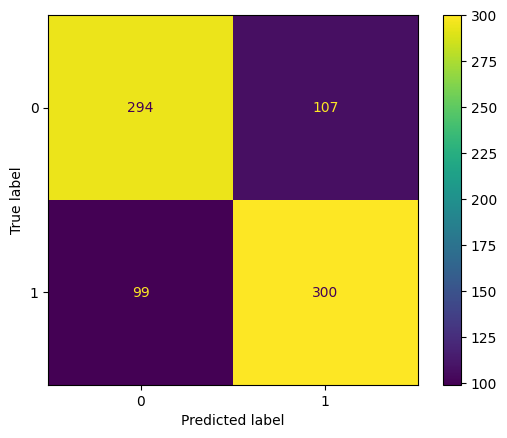

In [ ]:

cmat=ConfusionMatrixDisplay(cm,display_labels=np.unique(y).tolist())
cmat.plot()

In [ ]:
from keras.models import Model,Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
from keras.regularizers import l2

In [ ]:
model_layer =Sequential()
#input +hidden layer1
model_layer.add(Dense(units=6,activation="relu",input_shape=(xtrain.shape[1],)))
#hidden layer
model_layer.add(Dense(units=3,activation="relu"))
#if multiclas activation is "softmax"
model_layer.add(Dense(units=1,activation="sigmoid"))
model_layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping =EarlyStopping(monitor='accuracy',patience=10)

In [ ]:
model_layer.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

model_layer.fit(xtrain,ytrain,epochs=20,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/20
80/80 [==============================] - 3s 11ms/step - loss: 0.6981 - accuracy: 0.6223 - val_loss: 0.6949 - val_accuracy: 0.6016
Epoch 2/20
80/80 [==============================] - 0s 5ms/step - loss: 0.6580 - accuracy: 0.6461 - val_loss: 0.6568 - val_accuracy: 0.6297
Epoch 3/20
80/80 [==============================] - 0s 6ms/step - loss: 0.6268 - accuracy: 0.6723 - val_loss: 0.6278 - val_accuracy: 0.6422
Epoch 4/20
80/80 [==============================] - 1s 7ms/step - loss: 0.5974 - accuracy: 0.6984 - val_loss: 0.6002 - val_accuracy: 0.6797
Epoch 5/20
80/80 [==============================] - 1s 7ms/step - loss: 0.5675 - accuracy: 0.7191 - val_loss: 0.5742 - val_accuracy: 0.7141
Epoch 6/20
80/80 [==============================] - 1s 6ms/step - loss: 0.5393 - accuracy: 0.7395 - val_loss: 0.5469 - val_accuracy: 0.7281
Epoch 7/20
80/80 [==============================] - 1s 7ms/step - loss: 0.5127 - accuracy: 0.7547 - val_loss: 0.5181 - val_accuracy: 0.7516
Epoch 8/20
80/80 [=

In [ ]:
loss,accuracy=model_layer.evaluate(xtest,ytest)

25/25 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8587


In [ ]:
print(loss)
print(accuracy)

0.3339522182941437
0.8587499856948853


In [ ]:
model_layer =Sequential()
#input +hidden layer1
model_layer.add(Dense(units=6,activation="relu",kernel_regularizer=l2(0.01),input_shape=(xtrain.shape[1],)))
#hidden layer
model_layer.add(Dense(units=3,kernel_regularizer=l2(0.01),activation="relu"))
#if multiclas activation is "softmax"
model_layer.add(Dense(units=1,activation="sigmoid"))
model_layer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 54        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_layer.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model_layer.fit(xtrain,ytrain,epochs=20,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/20
80/80 [==============================] - 2s 9ms/step - loss: 0.8771 - accuracy: 0.5234 - val_loss: 0.8134 - val_accuracy: 0.5437
Epoch 2/20
80/80 [==============================] - 0s 6ms/step - loss: 0.7881 - accuracy: 0.5590 - val_loss: 0.7617 - val_accuracy: 0.5969
Epoch 3/20
80/80 [==============================] - 0s 5ms/step - loss: 0.7463 - accuracy: 0.5973 - val_loss: 0.7324 - val_accuracy: 0.6234
Epoch 4/20
80/80 [==============================] - 0s 5ms/step - loss: 0.7175 - accuracy: 0.6379 - val_loss: 0.7093 - val_accuracy: 0.6453
Epoch 5/20
80/80 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.6762 - val_loss: 0.6871 - val_accuracy: 0.6641
Epoch 6/20
80/80 [==============================] - 0s 5ms/step - loss: 0.6681 - accuracy: 0.6969 - val_loss: 0.6634 - val_accuracy: 0.6953
Epoch 7/20
80/80 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.7250 - val_loss: 0.6393 - val_accuracy: 0.7250
Epoch 8/20
80/80 [==

In [ ]:
loss,accuracy=model_layer.evaluate(xtest,ytest)

25/25 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.8338


In [ ]:
print(loss)
print(accuracy)

0.46986904740333557
0.8337500095367432


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras import datasets
(train_image,train_label),(test_image,test_label)=datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
#normalize
train_image=train_image/255.0
test_image=test_image/255.0

In [ ]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

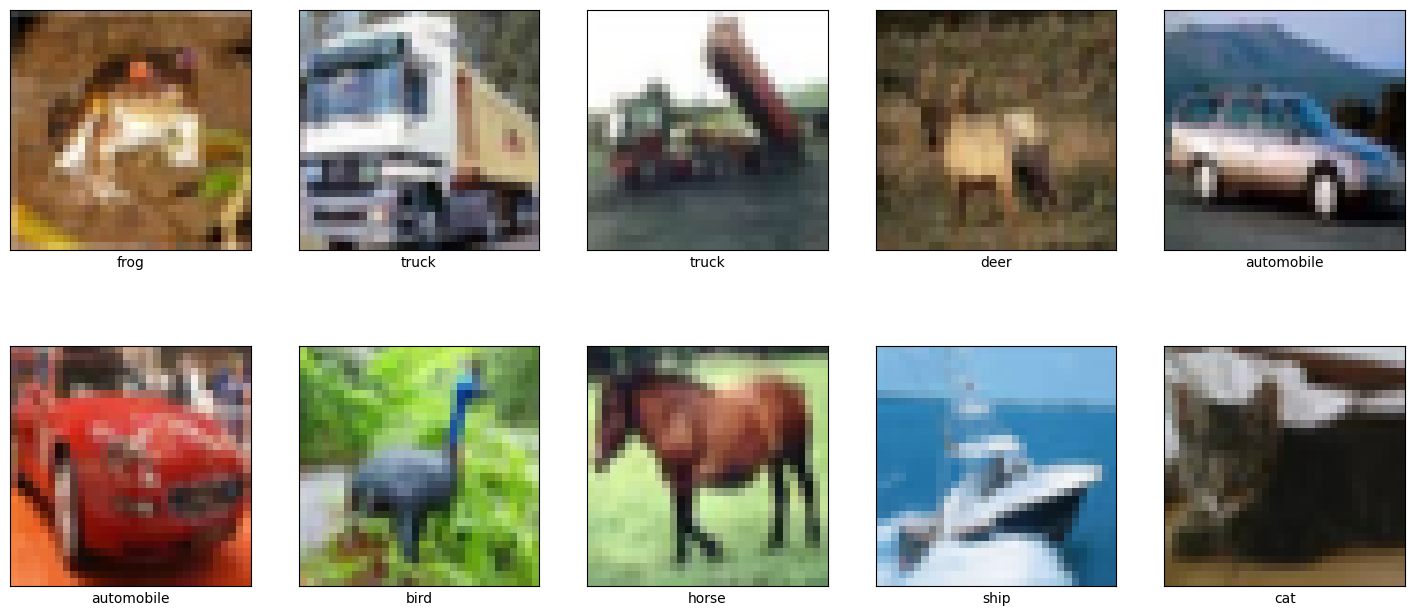

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_image[i])
  plt.xlabel(class_name[train_label[i][0]])
plt.show()

In [ ]:
train_labels=train_label.flatten()
test_labels=test_label.flatten()

In [ ]:
model=Sequential()
#model.add(Conv2D(32,(3,3),padding='same',stride=2))
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop

In [ ]:
#for multiclass loss="categorical_crossentropy"
import tensorflow as tf

model.compile(optimizer="adam",loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history=model.fit(train_image,train_label,epochs=25,batch_size=32,validation_data=(test_image,test_label))

Epoch 1/25
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5980 - accuracy: 0.4148 - val_loss: 1.3514 - val_accuracy: 0.5092
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2545 - accuracy: 0.5481 - val_loss: 1.1649 - val_accuracy: 0.5875
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1106 - accuracy: 0.6082 - val_loss: 1.0716 - val_accuracy: 0.6209
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0230 - accuracy: 0.6384 - val_loss: 1.0380 - val_accuracy: 0.6303
Epoch 5/25
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9554 - accuracy: 0.6646 - val_loss: 1.0310 - val_accuracy: 0.6414
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9035 - accuracy: 0.6827 - val_loss: 0.9614 - val_accuracy: 0.6685
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8558 - accuracy: 0.6997 - val_loss: 0.9393 - val_accura

In [ ]:
ry=model.fit(train_image,train_label,epochs=25,batch_size=32,validation_data=(test_image,test_label))


Epoch 1/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4709 - accuracy: 0.8327 - val_loss: 1.0113 - val_accuracy: 0.7020
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4622 - accuracy: 0.8368 - val_loss: 1.0188 - val_accuracy: 0.7042
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4482 - accuracy: 0.8417 - val_loss: 1.0469 - val_accuracy: 0.7049
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4324 - accuracy: 0.8447 - val_loss: 1.0220 - val_accuracy: 0.7054
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4226 - accuracy: 0.8495 - val_loss: 1.0390 - val_accuracy: 0.6979
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4154 - accuracy: 0.8525 - val_loss: 1.0651 - val_accuracy: 0.7007
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4022 - accuracy: 0.8570 - val_loss: 1.0949 - val_accuracy:

In [ ]:
loss,accuracy=model.evaluate(test_image,test_label)


313/313 [==============================] - 1s 3ms/step - loss: 1.4389 - accuracy: 0.6993


In [ ]:
import cv2
img=cv2.imread('pic.jpg')
img=cv2.resize(img,(32,32))
img=img.astype('float32')/255.0

In [ ]:
import numpy as np
img=np.expand_dims(img,axis=0)
y_pred=model.predict(img)
y_pred

1/1 [==============================] - 0s 302ms/step


array([[1.0000000e+00, 1.1237949e-14, 1.1244022e-09, 9.8005222e-09,
        1.2125134e-08, 2.5068691e-12, 2.3814375e-19, 1.0704701e-08,
        1.8887517e-18, 2.5658115e-10]], dtype=float32)

In [ ]:
class_name[np.argmax(y_pred)]

'airplane'